In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [2]:
#LOAD DATASET 😗
data = pd.read_csv("[Dataset]_(rekomendasi.csv")

In [3]:
print("Dataset Preview:")
data.head(10)

Dataset Preview:


,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
5,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
6,A2TY0BTJOTENPG,0511189877,5.0,1395878400
7,A34ATBPOK6HCHY,0511189877,5.0,1395532800
8,A89DO69P0XZ27,0511189877,5.0,1395446400
9,AZYNQZ94U6VDB,0511189877,5.0,1401321600


In [4]:
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   AKM1MP6P0OYPR  object 
 1   0132793040     object 
 2   5.0            float64
 3   1365811200     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [5]:
## Data Cleaning: Handle missing values
print("\nHandling Missing Values:")
print(data.isnull().sum())
data = data.dropna()


Handling Missing Values:
AKM1MP6P0OYPR    0
0132793040       0
5.0              0
1365811200       0
dtype: int64


In [6]:
# Separate numerical and non-numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
non_numerical_columns = data.select_dtypes(exclude=['int64', 'float64']).columns

In [7]:
# Display the columns
print("Numerical Columns:", numerical_columns)
print("Non-Numerical Columns:", non_numerical_columns)

Numerical Columns: Index(['5.0', '1365811200'], dtype='object')
Non-Numerical Columns: Index(['AKM1MP6P0OYPR', '0132793040'], dtype='object')


In [8]:
# Normalize the numerical columns
scaler = StandardScaler()
data_scaled_numerical = scaler.fit_transform(data[numerical_columns])

In [9]:
# Convert the scaled data back to a DataFrame
data_scaled_numerical = pd.DataFrame(data_scaled_numerical, columns=numerical_columns)

In [10]:
# Combine scaled numerical data with non-numerical data
data_scaled = pd.concat([data_scaled_numerical, data[non_numerical_columns].reset_index(drop=True)], axis=1)

In [11]:
# Display the first few rows of the scaled dataset
print(data_scaled.head())

        5.0  1365811200   AKM1MP6P0OYPR  0132793040
0  0.715227    0.042354  A2CX7LUOHB2NDG  0321732944
1 -2.181415    0.420487  A2NWSAGRHCP8N5  0439886341
2 -0.733094    0.525663  A2WNBOD3WNDNKT  0439886341
3 -2.181415   -0.050301  A1GI0U4ZRJA8WN  0439886341
4  0.715227    0.858721  A1QGNMC6O1VW39  0511189877


In [12]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled_numerical)

In [13]:
# Add cluster labels to the original data
data['Cluster'] = clusters

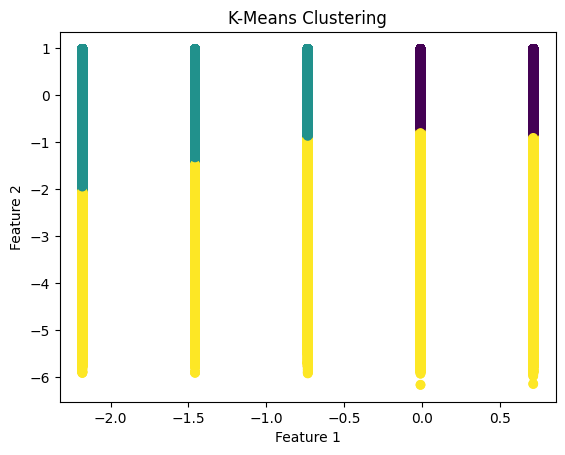

In [14]:
# Visualize the clustering result (using the first two numerical features for simplicity)
plt.scatter(data_scaled_numerical.iloc[:, 0], data_scaled_numerical.iloc[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

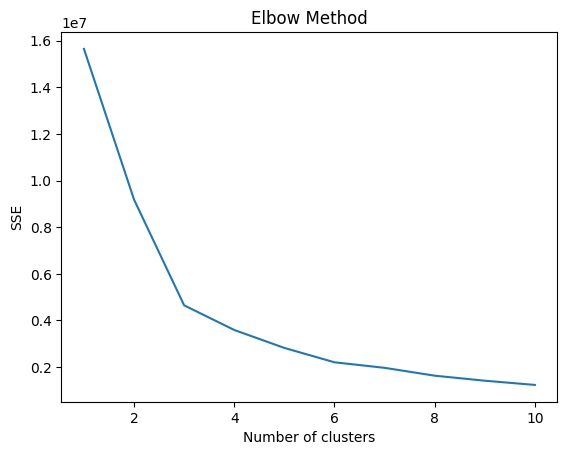

In [16]:

# Elbow Method to find the optimal number of clusters
# SElbow Method: Teknik untuk menentukan jumlah cluster yang optimal dengan memplot SSE (Sum of Squared Errors) terhadap jumlah cluster. 
# Titik di mana penurunan SSE mulai melambat (membentuk siku/elbow) menunjukkan jumlah cluster yang optimal.
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_numerical)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()